### Overview of the Project: Community Detection and Node Embeddings

This project focuses on **community detection** in graphs using different methods and **node embeddings**. The objective is to explore the effectiveness of various community detection algorithms and how well they perform when applied to graphs with node embeddings. The project involves the following key tasks:

1. **Community Detection Algorithms**:
   - Several algorithms are used to detect communities in graphs, such as **Label Propagation**, **Louvain**, **Girvan-Newman**, **Kernighan-Lin**, and **Infomap**.
   - Each algorithm helps partition the graph into meaningful clusters or communities of nodes, with the goal of understanding the structure of the graph.

2. **Node Embedding Methods**:
   - Node embeddings are generated using methods like **HOPE**, **DeepWalk**, and **Node2Vec**. These methods represent nodes in a lower-dimensional vector space, capturing the structural relationships between nodes.
   - The embeddings are then used as input for community detection algorithms to improve or compare the quality of the detected communities.

3. **Dimensionality Reduction**:
   - **PCA (Principal Component Analysis)** is applied to reduce the dimensionality of node features, simplifying the graph's structure while retaining critical information for community detection.

4. **Evaluation Metrics**:
   - The quality of community detection results is evaluated using multiple metrics:
     - **ARI (Adjusted Rand Index)**: Measures the similarity between the detected communities and ground-truth communities, adjusted for chance.
     - **NMI (Normalized Mutual Information)**: Measures the mutual information between the detected communities and ground-truth communities.
     - **Modularity**: A measure of the strength of division of a graph into communities, indicating the quality of community structure.

This project integrates graph theory, machine learning, and community detection algorithms to understand complex network structures and improve the detection of underlying communities. The analysis provides insights into the performance of different methods and their applicability to real-world graph data.


### Task 1 and Task 2: Loading and Preprocessing Graphs

In this task, the objective is to load graphs from different data sources such as `.mtx`, `.edges`, and `.node_labels` files. After loading the graphs, preprocessing is done, including removing self-loops, ensuring the graph is undirected if needed, and selecting the largest connected component. The preprocessing steps are necessary to focus on the most important part of the graph for analysis or further modeling.

The following steps will be followed:
1. **Load Graphs from `.mtx` Files**: The matrix data will be converted into graphs where edges connect pairs of nodes.
2. **Load Graphs from `.edges` Files**: The edges will be read from a file where each line consists of two nodes separated by commas.
3. **Load Node Labels from `.node_labels` Files**: Node labels will be loaded and assigned to the nodes in the graph.
4. **Preprocess the Graphs**: Self-loops will be removed, the graph will be converted to undirected (if required), and only the largest connected component will be retained if the graph is not already connected.


In [22]:
import networkx as nx
from scipy.io import mmread
import os

# مرحله 1: بارگذاری فایل .mtx (Matrix Market)
def load_mtx_to_graph(filepath):
    matrix = mmread(filepath).tocoo()  # ماتریس به فرمت COO
    edges = zip(matrix.row, matrix.col)  # جفت گره‌ها
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

# مرحله 2: بارگذاری فایل .edges
def load_edges_from_file(filepath):
    edges = []
    with open(filepath, 'r') as file:
        for line in file:
            # فرض می‌کنیم که هر خط شامل دو گره است که با کاما جدا شده‌اند
            node1, node2, _ = map(int, line.strip().split(','))  # مقدار سوم را نادیده می‌گیریم
            edges.append((node1, node2))
    return edges

# مرحله 3: بارگذاری فایل .node_labels
def load_node_labels(filepath):
    labels = {}
    with open(filepath, 'r') as file:
        for line in file:
            # فرض می‌کنیم که هر خط شامل شناسه گره و برچسب آن است
            node, label = map(int, line.strip().split(','))
            labels[node] = label
    return labels

# مرحله 4: ساخت گراف از فایل‌ها
def create_graph_from_files(mtx_filepath=None, edges_filepath=None, labels_filepath=None):
    G = nx.Graph()

    # اگر فایل .mtx داده شده باشد، آن را بارگذاری می‌کنیم
    if mtx_filepath:
        G = load_mtx_to_graph(mtx_filepath)

    # اگر فایل .edges داده شده باشد، آن را بارگذاری می‌کنیم
    if edges_filepath:
        edges = load_edges_from_file(edges_filepath)
        G.add_edges_from(edges)

    # اگر فایل .node_labels داده شده باشد، آن را بارگذاری می‌کنیم
    if labels_filepath:
        labels = load_node_labels(labels_filepath)
        nx.set_node_attributes(G, labels, name='label')

    return G

# مرحله 5: پیش‌پردازش گراف
def preprocess_graph(G):
    # حذف طوقه‌ها
    G.remove_edges_from(nx.selfloop_edges(G))

    # بدون‌جهت کردن گراف (در صورت نیاز)
    if nx.is_directed(G):
        G = G.to_undirected()

    # انتخاب بزرگ‌ترین مؤلفه متصل
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    return G

# بارگذاری تمامی گراف‌ها
def load_and_preprocess_graphs():
    # نام فایل‌های mtx و edges
    mtx_files = ['football.mtx', 'jazz.mtx']  # لیست فایل‌های .mtx
    edges_files = ['cora.edges', 'citeseer.edges']  # لیست فایل‌های .edges
    labels_files = ['cora.node_labels', 'citeseer.node_labels']  # لیست فایل‌های .node_labels

    graphs = {}

    # بارگذاری گراف‌های .mtx
    for mtx_file in mtx_files:
        # استخراج نام فایل بدون پسوند
        graph_name = os.path.splitext(mtx_file)[0]
        G = create_graph_from_files(mtx_filepath=mtx_file)
        G = preprocess_graph(G)
        graphs[graph_name] = G

    # بارگذاری گراف‌های .edges
    for i, edges_file in enumerate(edges_files):
        # استخراج نام فایل بدون پسوند
        graph_name = os.path.splitext(edges_file)[0]
        G = create_graph_from_files(edges_filepath=edges_file, labels_filepath=labels_files[i])
        G = preprocess_graph(G)
        graphs[graph_name] = G

    return graphs

# بارگذاری و پیش‌پردازش تمام گراف‌ها
graphs = load_and_preprocess_graphs()

# نمایش اطلاعات گراف‌ها
for graph_name, G in graphs.items():
    print(f"گراف {graph_name} - تعداد گره‌ها: {G.number_of_nodes()}, تعداد یال‌ها: {G.number_of_edges()}")


گراف football - تعداد گره‌ها: 35, تعداد یال‌ها: 118
گراف jazz - تعداد گره‌ها: 198, تعداد یال‌ها: 2742
گراف cora - تعداد گره‌ها: 2485, تعداد یال‌ها: 5069
گراف citeseer - تعداد گره‌ها: 2110, تعداد یال‌ها: 3668


### Code Explanations

The `load_mtx_to_graph(filepath)` function loads a `.mtx` file and converts it into a graph.

The `load_edges_from_file(filepath)` function reads an `.edges` file and returns a list of edges as tuples.

The `load_node_labels(filepath)` function reads a `.node_labels` file and returns a dictionary of node labels.

The `create_graph_from_files(mtx_filepath=None, edges_filepath=None, labels_filepath=None)` function loads and creates a graph from `.mtx`, `.edges`, and `.node_labels` files.

The `preprocess_graph(G)` function removes self-loops, ensures the graph is undirected, and selects the largest connected component.

The `load_and_preprocess_graphs()` function loads and preprocesses multiple graphs from predefined files and returns them in a dictionary.


### Task 3: visualizing graphs

The task is to visualize graphs with the best possible layout. The goal is to represent the graph in a visually informative way, ensuring that the layout and appearance help convey the structure of the graph clearly.


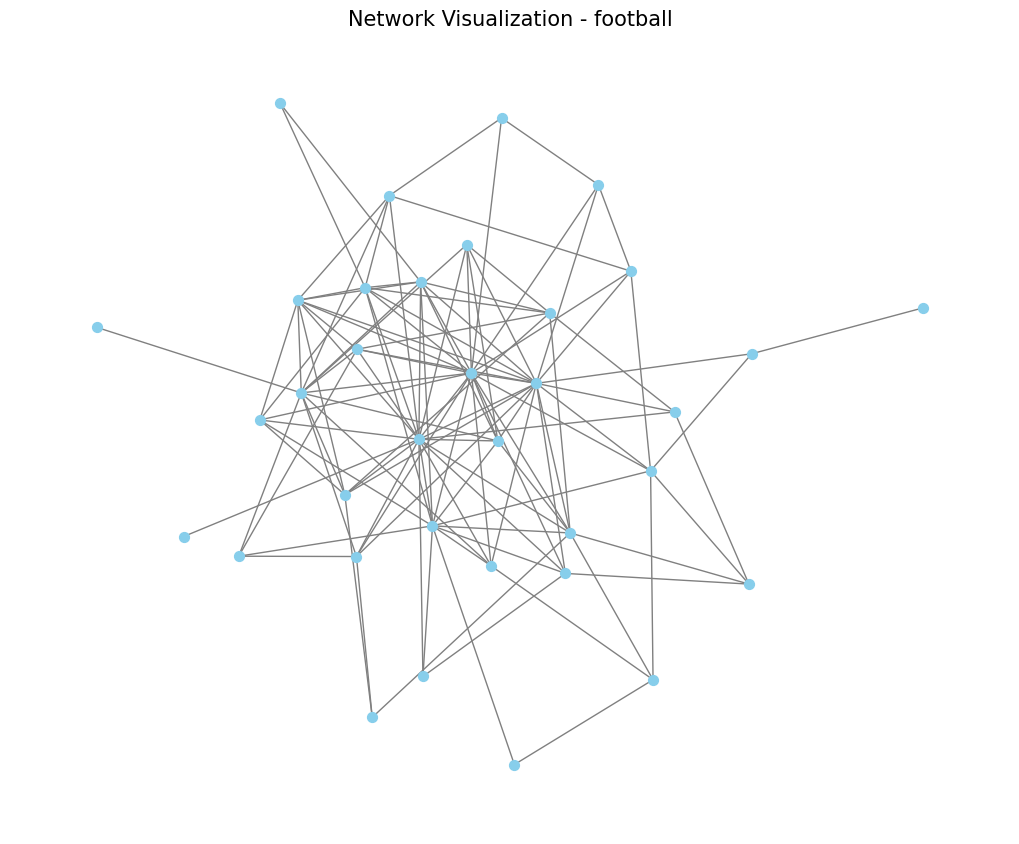

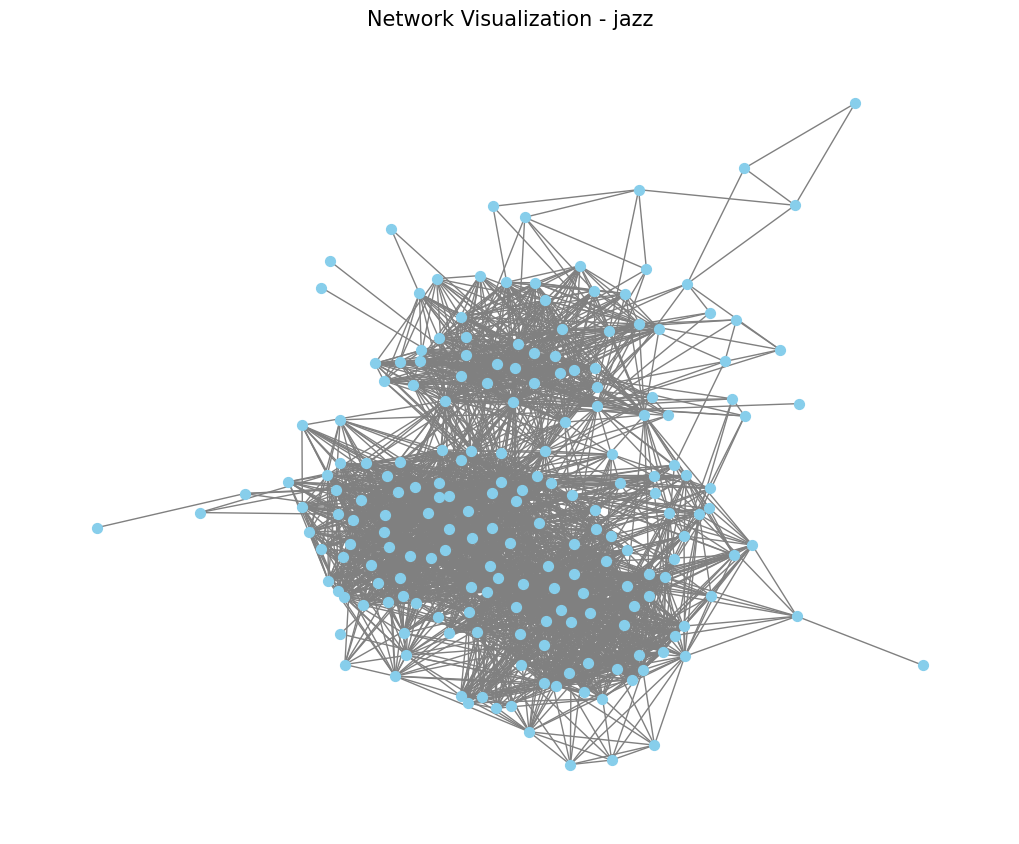

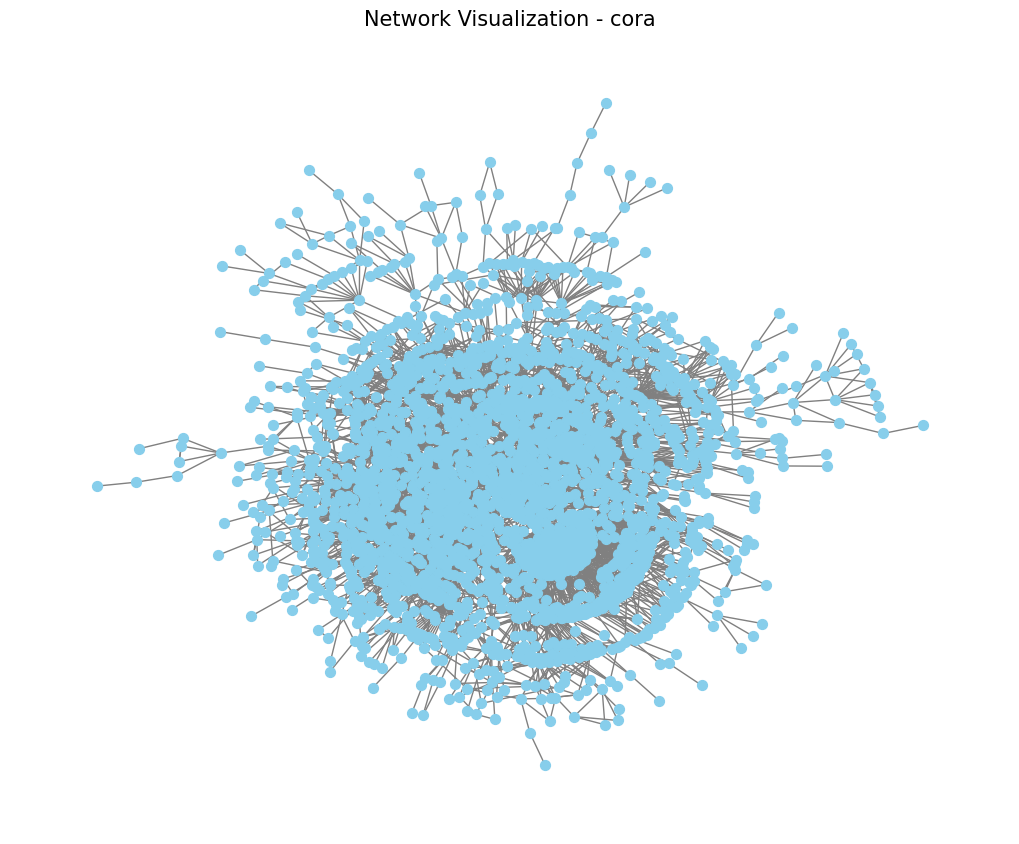

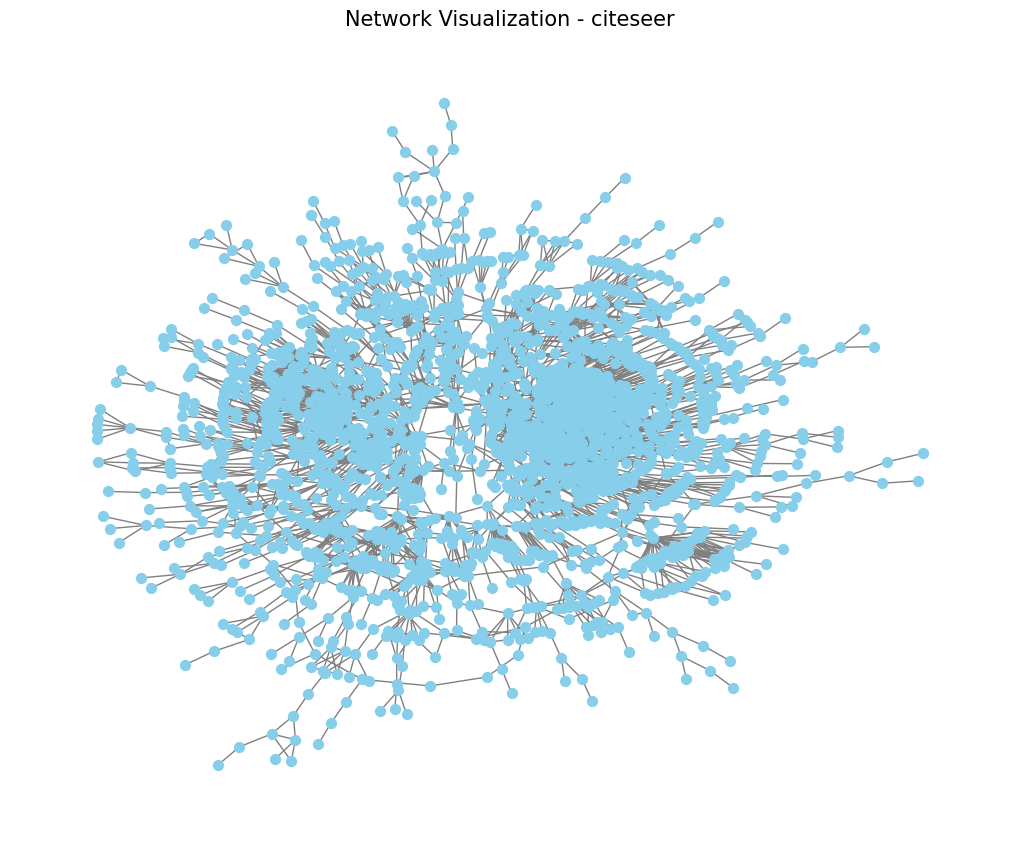

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(G, dataset_name, layout='spring', node_size=50, node_color='skyblue', font_size=10):
    # انتخاب چیدمان
    if layout == 'spring':
        pos = nx.spring_layout(G)  # چیدمان به سبک فنری
    elif layout == 'circular':
        pos = nx.circular_layout(G)  # چیدمان دایره‌ای
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)  # چیدمان کامادا کاوای
    else:
        pos = nx.spring_layout(G)  # چیدمان پیش‌فرض

    # رسم گراف
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color, font_size=font_size, font_weight='bold', edge_color='gray')

    # عنوان گراف با نام دیتاست
    plt.title(f"Network Visualization - {dataset_name}", fontsize=15)
    plt.show()

# برای گراف‌های مختلف، می‌توانیم این تابع را فراخوانی کنیم
for graph_name, G in graphs.items():
    visualize_graph(G, dataset_name=graph_name, layout='kamada_kawai')  # چیدمان فنری برای مثال



### Code Explanation

The `visualize_graph(G, dataset_name, layout='spring', node_size=50, node_color='skyblue', font_size=10)` function visualizes the graph `G` with the following options:

- **`layout`**: This determines the layout algorithm for positioning the nodes. It supports 'spring', 'circular', and 'kamada_kawai' layouts.
- **`node_size`**: Defines the size of the nodes in the visualization.
- **`node_color`**: Sets the color of the nodes.
- **`font_size`**: Controls the font size for the labels.

The function draws the graph using NetworkX’s `draw()` function and customizes the appearance based on the input parameters. It then displays the visualization with a title that includes the dataset name.

The function is called in a loop to visualize different graphs in the `graphs` dictionary, with the 'kamada_kawai' layout being used as an example.

### Task 4: Extracting Node Features using Centrality and Similarity Measures

In this task, the goal is to extract at least 10 different features for each node in a graph using various centrality and similarity measures. These features provide valuable insights into the structure of the graph and help in understanding the roles and importance of individual nodes within the network. These features can be used for tasks such as node classification, clustering, or graph analysis. The selected features include centrality measures like degree, closeness centrality, betweenness centrality, and others, as well as some similarity-based measures such as neighbor overlap and diversity.


In [ ]:
import networkx as nx

def extract_node_features(G):
    features = {}

    # 1. درجه گراف (Degree)
    degree_centrality = {node: G.degree(node) for node in G.nodes}

    # 2. مرکزیّت کلوزنس (Closeness Centrality)
    closeness_centrality = nx.closeness_centrality(G)

    # 3. مرکزیّت بینابینی (Betweenness Centrality)
    betweenness_centrality = nx.betweenness_centrality(G)

    # 4. مرکزیّت ویژه (Eigenvector Centrality)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # 5. مرکزیّت PageRank
    pagerank = nx.pagerank(G)

    # 6. اندازه مؤلفه متصل (Component Size)
    connected_components = list(nx.connected_components(G))
    component_size = {node: len(next(cc for cc in connected_components if node in cc)) for node in G.nodes}

    # 7. همپوشانی همسایگان (Neighbor Overlap)
    neighbor_overlap = {}
    for node in G.nodes:
        neighbors = set(G.neighbors(node))
        overlap = 0
        for neighbor in neighbors:
            overlap += len(neighbors.intersection(set(G.neighbors(neighbor))))
        neighbor_overlap[node] = overlap

    # 8. دوره متوسط (Average Path Length)
    try:
        average_path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        average_path_length = -1  # برای گراف‌های جدا از هم

    # 9. درجه متوسط همسایگان (Average Neighbor Degree)
    avg_neighbor_degree = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if neighbors:
            avg_neighbor_degree[node] = sum([G.degree(neighbor) for neighbor in neighbors]) / len(neighbors)
        else:
            avg_neighbor_degree[node] = 0  # برای گره‌های بدون همسایه

    # 10. تنوع همسایگان (Neighbor Diversity)
    neighbor_diversity = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        degrees = [G.degree(neighbor) for neighbor in neighbors]
        neighbor_diversity[node] = len(set(degrees))  # تعداد درجات مختلف

    # ذخیره ویژگی‌ها
    for node in G.nodes:
        features[node] = {
            'degree': degree_centrality[node],
            'closeness_centrality': closeness_centrality[node],
            'betweenness_centrality': betweenness_centrality[node],
            'eigenvector_centrality': eigenvector_centrality[node],
            'pagerank': pagerank[node],
            'component_size': component_size[node],
            'neighbor_overlap': neighbor_overlap[node],
            'average_path_length': average_path_length,
            'average_neighbor_degree': avg_neighbor_degree[node],
            'neighbor_diversity': neighbor_diversity[node]
        }

    return features

# فراخوانی تابع برای استخراج ویژگی‌ها از گراف‌ها
for graph_name, G in graphs.items():
    print(f"استخراج ویژگی‌ها برای گراف {graph_name}...")
    node_features = extract_node_features(G)
    print(f"ویژگی‌های استخراج‌شده برای گراف {graph_name}: {node_features}")



### Code Explanation

The `extract_node_features(G)` function extracts 10 different features for each node in the graph `G`:

1. **Degree**: The number of edges connected to a node.
2. **Closeness Centrality**: A measure of how close a node is to all other nodes in the graph.
3. **Betweenness Centrality**: A measure of the number of shortest paths passing through a node.
4. **Eigenvector Centrality**: A measure of a node's influence in a network, considering the influence of its neighbors.
5. **PageRank**: A measure of a node's importance based on the number of links pointing to it.
6. **Component Size**: The size of the connected component to which a node belongs.
7. **Neighbor Overlap**: The number of common neighbors between a node and its neighbors.
8. **Average Path Length**: The average shortest path length from a node to all other nodes in the graph.
9. **Average Neighbor Degree**: The average degree of the neighbors of a node.
10. **Neighbor Diversity**: The diversity of degrees of the neighbors of a node.

These features are calculated and stored for each node in a dictionary, and the function returns the dictionary containing these features for all nodes. The function is called for each graph in the `graphs` dictionary, and the extracted features are printed for each graph.

### Task 5: Identifying Key Features using Dimensionality Reduction (PCA)

In this task, the goal is to identify the most important features of the graph nodes by applying a dimensionality reduction technique, such as Principal Component Analysis (PCA), or by analyzing correlations. PCA is a statistical method used to reduce the number of features while retaining the most important information in the data. By projecting the original features onto a lower-dimensional space, PCA helps to highlight the key features that contribute most to the variance in the data.


اجرای PCA برای گراف football...
نسبت واریانس توضیحی هر مؤلفه PCA: [0.983371   0.01138301]
مؤلفه‌های PCA:
[[ 1.65155523e-01  2.78083647e-03  1.56401331e-03  3.26160829e-03
   5.85894082e-04  0.00000000e+00  9.82487311e-01  7.95625246e-34
  -8.28257889e-03  8.57471605e-02]
 [-2.08815800e-01  3.22681835e-03 -4.18214754e-03  2.15739733e-03
  -1.00715737e-03 -0.00000000e+00  5.09703023e-02 -8.46381703e-33
   9.72638164e-01 -8.79739822e-02]]


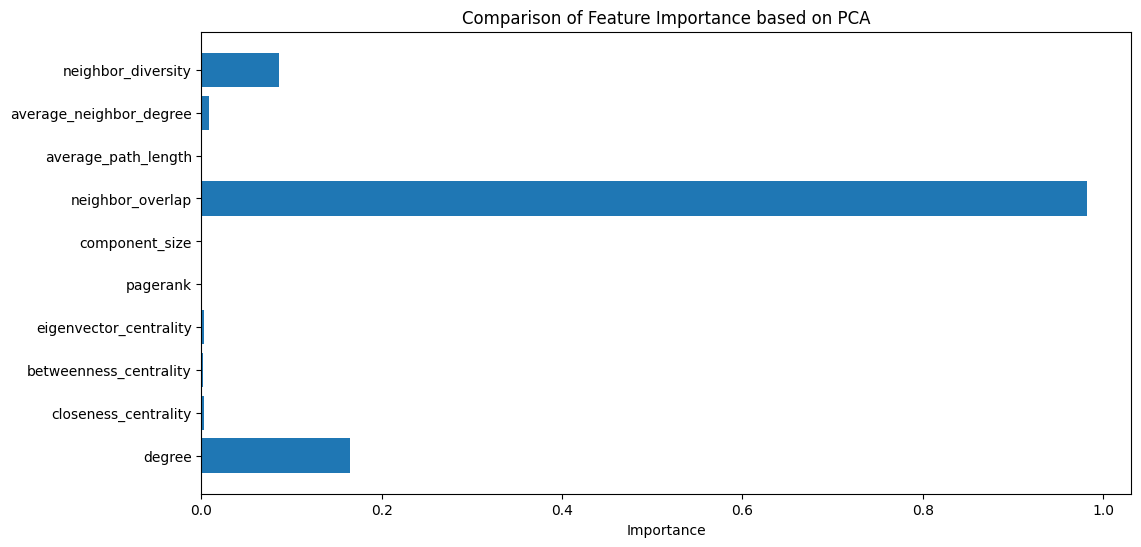

اجرای PCA برای گراف jazz...
نسبت واریانس توضیحی هر مؤلفه PCA: [9.99546263e-01 3.14397769e-04]
مؤلفه‌های PCA:
[[ 3.39173421e-02  9.56537068e-05  1.50970546e-05  8.15425699e-05
   4.69100934e-06  2.16059338e-20  9.99225483e-01 -1.80656059e-18
   5.12467607e-03  1.92813049e-02]
 [ 9.58655739e-02  2.95814571e-03 -3.50077325e-04  1.12167286e-03
  -2.30868796e-05 -1.33125988e-14 -1.21174930e-02 -5.13511063e-16
   9.74976668e-01  2.00183223e-01]]


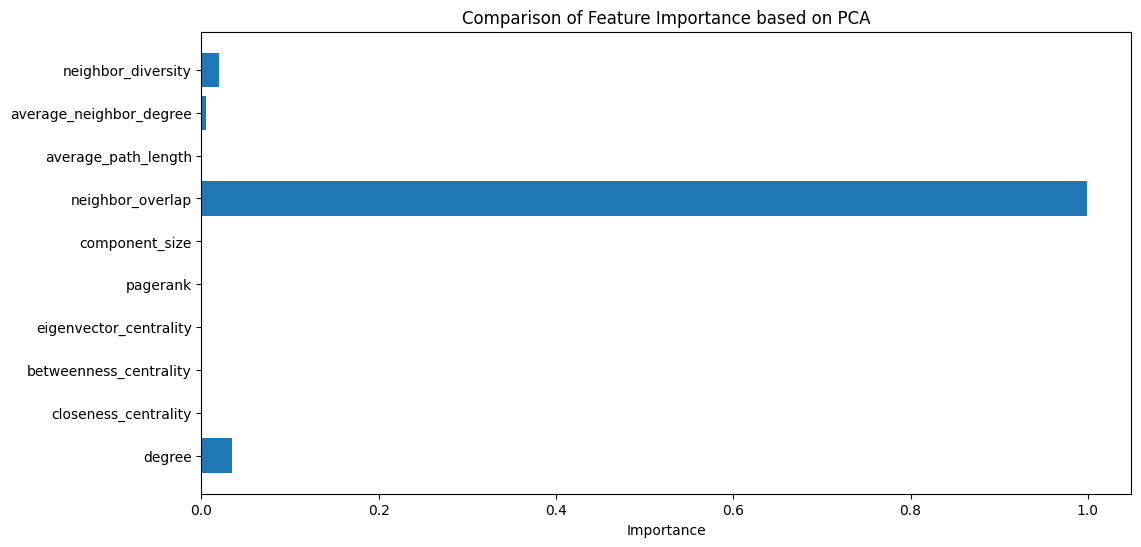

اجرای PCA برای گراف cora...
نسبت واریانس توضیحی هر مؤلفه PCA: [0.67103651 0.30859975]
مؤلفه‌های PCA:
[[-2.69912480e-02  8.28597703e-04 -1.40053533e-05  5.30491001e-04
  -3.17570560e-06 -4.68355919e-14 -2.28554660e-02 -5.56663425e-17
   9.99373295e-01 -1.07202648e-03]
 [ 4.55423807e-01  6.57562290e-04  6.00045465e-04  1.05304042e-03
   3.46953630e-05 -3.32261236e-15  8.82841897e-01  5.45145722e-16
   3.26075523e-02  1.10064463e-01]]


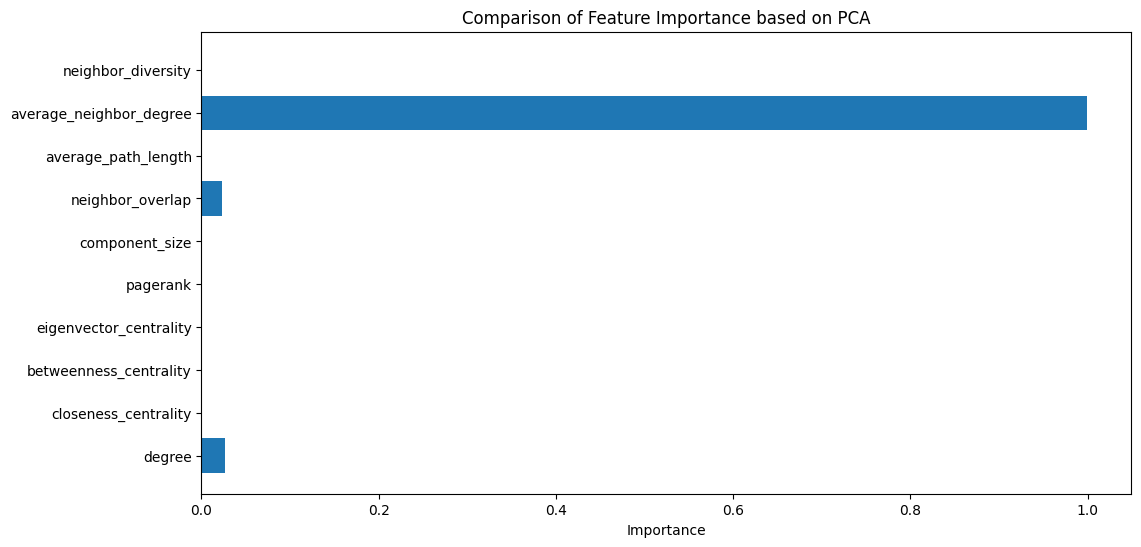

اجرای PCA برای گراف citeseer...
نسبت واریانس توضیحی هر مؤلفه PCA: [0.5351516  0.42402168]
مؤلفه‌های PCA:
[[ 2.79114056e-01  8.59697375e-04  2.91027708e-04  1.68245849e-03
   1.85171955e-05  1.74843935e-14  8.01246019e-01 -5.40948560e-16
   5.10450374e-01  1.39774539e-01]
 [-1.87074714e-01  4.37757910e-04 -2.48425833e-04 -1.53373792e-04
  -1.84343089e-05  3.71625762e-14 -4.70117631e-01 -1.75056354e-16
   8.59633715e-01 -7.08665160e-02]]


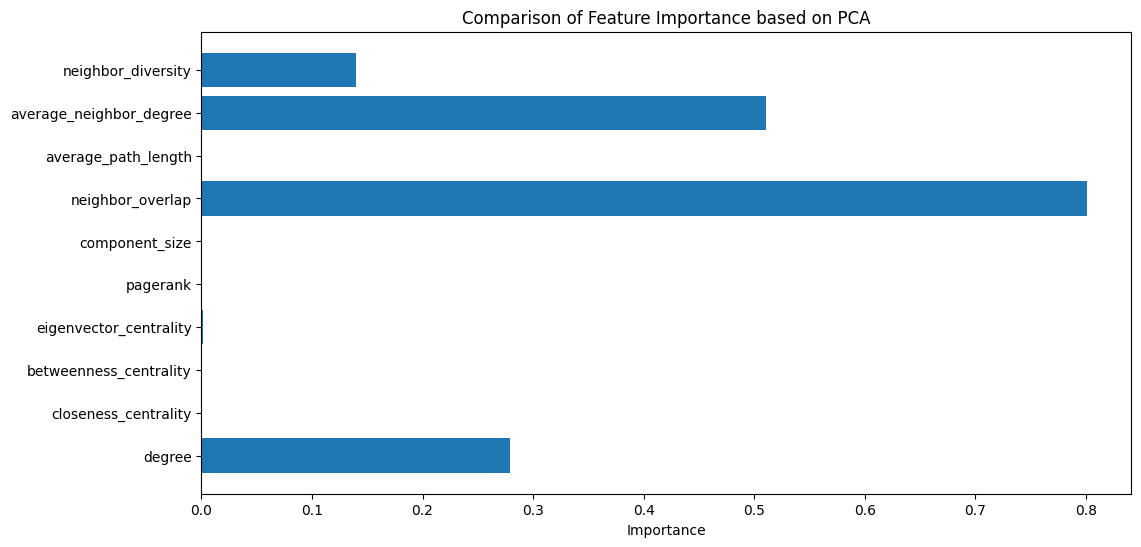

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

def apply_pca_and_plot(features):
    """
    اعمال PCA برای کاهش ابعاد و استخراج مهم‌ترین ویژگی‌ها
    سپس مقایسه آنها روی نمودار.
    """
    # تبدیل دیکشنری ویژگی‌ها به DataFrame
    feature_df = pd.DataFrame(features).T
    feature_df = feature_df.fillna(0)  # جایگزینی NaNها با 0 برای جلوگیری از مشکلات

    # اعمال PCA برای کاهش ابعاد
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(feature_df)

    # نتایج PCA
    explained_variance = pca.explained_variance_ratio_
    components = pca.components_

    # نمایش توضیحات واریانس
    print(f"نسبت واریانس توضیحی هر مؤلفه PCA: {explained_variance}")
    print(f"مؤلفه‌های PCA:\n{components}")

    # پیدا کردن ویژگی‌های مهم بر اساس وزن‌ها در مؤلفه‌های PCA
    # هر ویژگی که وزن بالاتری داشته باشد، برای گراف اهمیت بیشتری دارد
    feature_importance = np.abs(components[0])  # وزن‌های اولین مؤلفه را برای اهمیت ویژگی‌ها در نظر می‌گیریم

    # نمودار مقایسه اهمیت ویژگی‌ها
    feature_names = feature_df.columns
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, feature_importance)
    plt.xlabel('Importance')
    plt.title('Comparison of Feature Importance based on PCA')
    plt.show()

# فرض کنیم که ویژگی‌ها از قبل استخراج شده‌اند (به‌طور مثال از تابع extract_node_features)
for graph_name, G in graphs.items():
    print(f"اجرای PCA برای گراف {graph_name}...")
    node_features = extract_node_features(G)
    # اعمال PCA و نمایش نمودار مقایسه ویژگی‌ها
    apply_pca_and_plot(node_features)


### Code Explanation

The `apply_pca_and_plot(features)` function applies PCA to reduce the dimensionality of the node features and identifies the most important ones:

1. **Data Preparation**: The node features, which are stored in a dictionary, are converted to a DataFrame for easier manipulation.
2. **PCA Application**: PCA is applied to the feature DataFrame, reducing the data to two components (for visualization purposes).
3. **Explained Variance**: The explained variance ratio is calculated, showing how much of the total variance is captured by each principal component.
4. **Feature Importance**: The importance of each feature is determined by its weight in the first principal component. Higher weights indicate greater importance.
5. **Visualization**: A horizontal bar chart is generated to visually compare the importance of the features based on their weights in the first principal component.

The function is applied to each graph in the `graphs` dictionary, and the results are displayed.

### Task 6: Community Detection using K-means Clustering

In this task, we aim to detect communities within a graph using a clustering technique, specifically K-means. Communities in a network are groups of nodes that are more closely connected to each other than to nodes outside their group. K-means clustering is a popular algorithm used to partition the graph nodes into a predefined number of communities based on the features of the nodes, such as their degree.

The steps for this task involve:
1. Extracting node features (in this case, node degree).
2. Standardizing the features.
3. Applying the K-means algorithm to identify communities.
4. Visualizing the communities by coloring the nodes based on their community label.


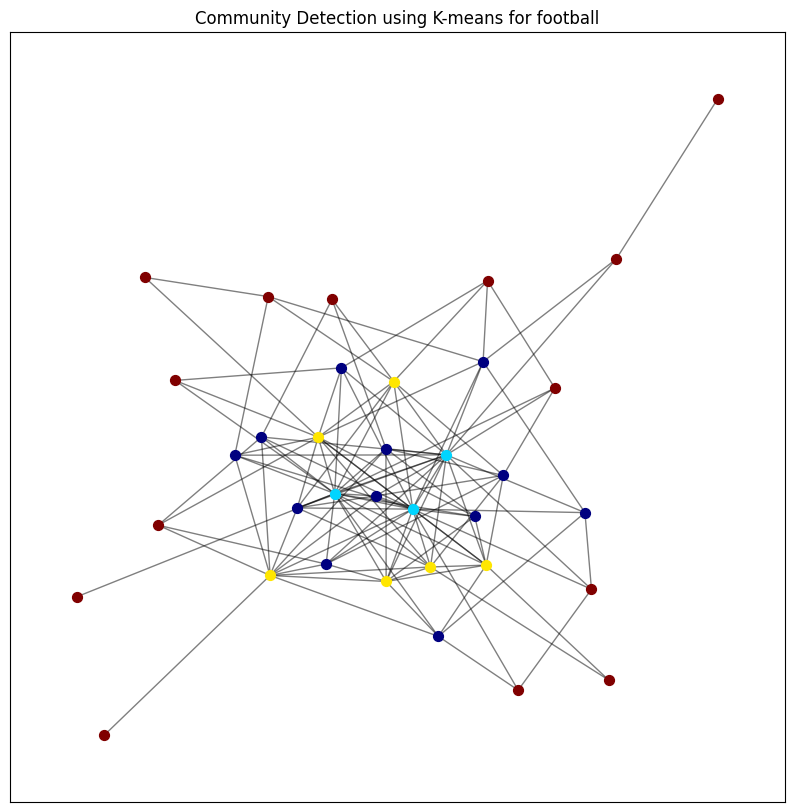

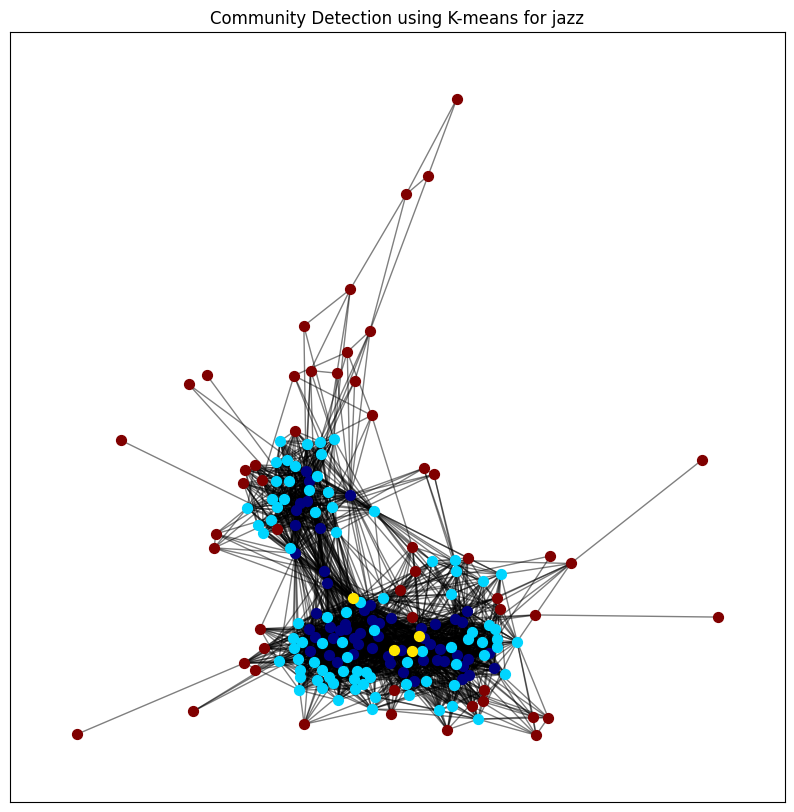

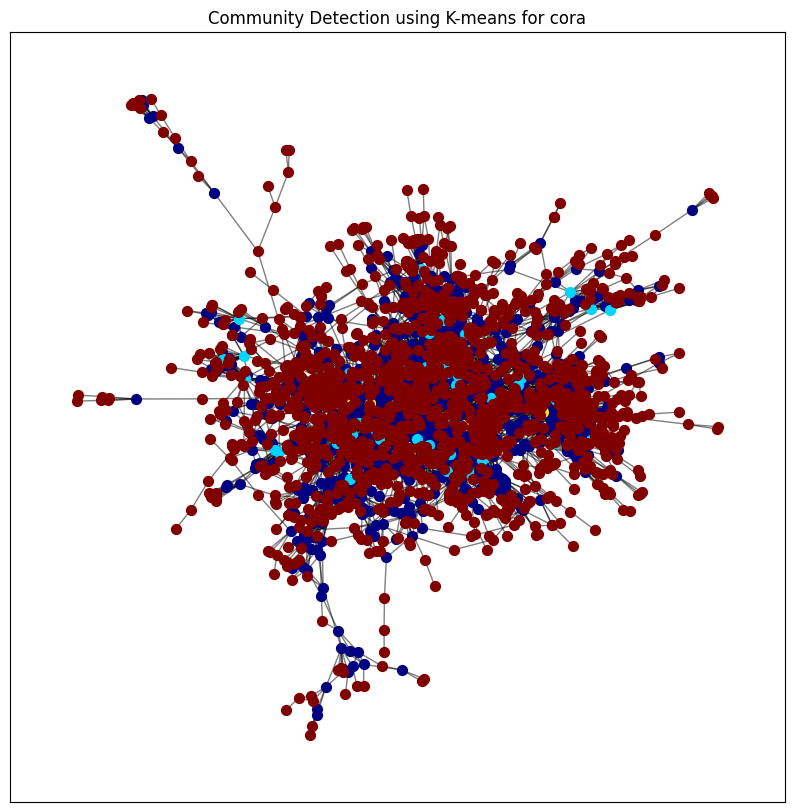

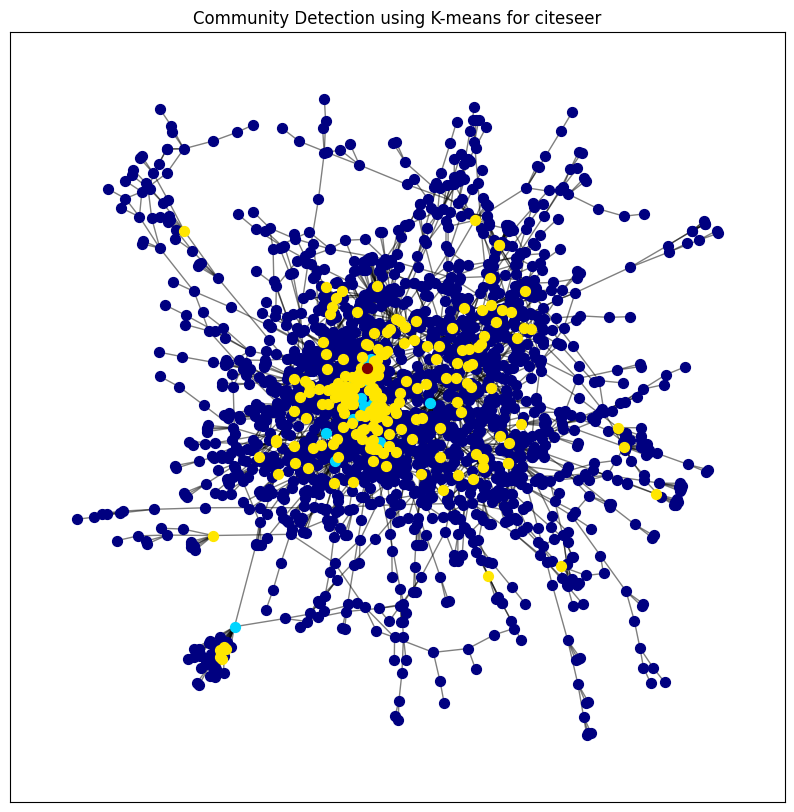

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# تابعی برای شبیه‌سازی جوامع با K-means
def community_detection_kmeans(graph, num_communities):
    # استخراج ویژگی‌ها از گراف (در اینجا از درجه گره‌ها استفاده می‌کنیم)
    degrees = np.array([degree for node, degree in graph.degree()])

    # استانداردسازی ویژگی‌ها
    scaler = StandardScaler()
    degrees_scaled = scaler.fit_transform(degrees.reshape(-1, 1))

    # اعمال K-means برای تشخیص جوامع
    kmeans = KMeans(n_clusters=num_communities)
    labels = kmeans.fit_predict(degrees_scaled)

    return labels

# تابعی برای مصورسازی گراف و جوامع
def visualize_communities(graph, labels, dataset_name):
    pos = nx.spring_layout(graph)  # موقعیت گره‌ها برای مصورسازی
    plt.figure(figsize=(10, 10))

    # رنگ‌بندی گره‌ها بر اساس برچسب جامعه‌شان
    for community_id in set(labels):
        nodes_in_community = [node for node, label in zip(graph.nodes(), labels) if label == community_id]
        nx.draw_networkx_nodes(graph, pos, nodes_in_community, node_size=50,
                               node_color=[plt.cm.jet(community_id / max(labels))])  # رنگ‌گذاری بر اساس ID جامعه

    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(f"Community Detection using K-means for {dataset_name}")
    plt.show()

# تعداد جوامع برای هر گراف
num_communities = 4

# اجرای الگوریتم و مصورسازی برای هر گراف
for dataset_name, graph in graphs.items():
    # استخراج جوامع
    labels = community_detection_kmeans(graph, num_communities)

    # مصورسازی جوامع
    visualize_communities(graph, labels, dataset_name)



### Code Explanation

1. **Community Detection**:
   - The `community_detection_kmeans(graph, num_communities)` function extracts the degree of each node in the graph and standardizes the values.
   - The K-means algorithm is applied to these standardized degrees to assign each node to one of the specified communities (`num_communities`).

2. **Visualization**:
   - The `visualize_communities(graph, labels, dataset_name)` function visualizes the graph with nodes colored according to their assigned community label.
   - The `spring_layout` is used to position the nodes for visualization.
   - Nodes within the same community are assigned the same color to visually distinguish the communities.

The algorithm and visualization are applied to each graph in the `graphs` dictionary.


### Task 6 - Additional: Community Detection using Label Propagation

In this task, the goal is to identify communities in a graph using the **Label Propagation Algorithm (LPA)**. The label propagation algorithm is an efficient, semi-supervised method for community detection where each node initially holds a unique label, and iteratively, nodes adopt the most frequent label among their neighbors. This process continues until convergence, resulting in communities formed by nodes with the same label.

Steps involved in this task:
1. Applying the Label Propagation Algorithm to detect communities.
2. Visualizing the communities by coloring the nodes according to their assigned community label.


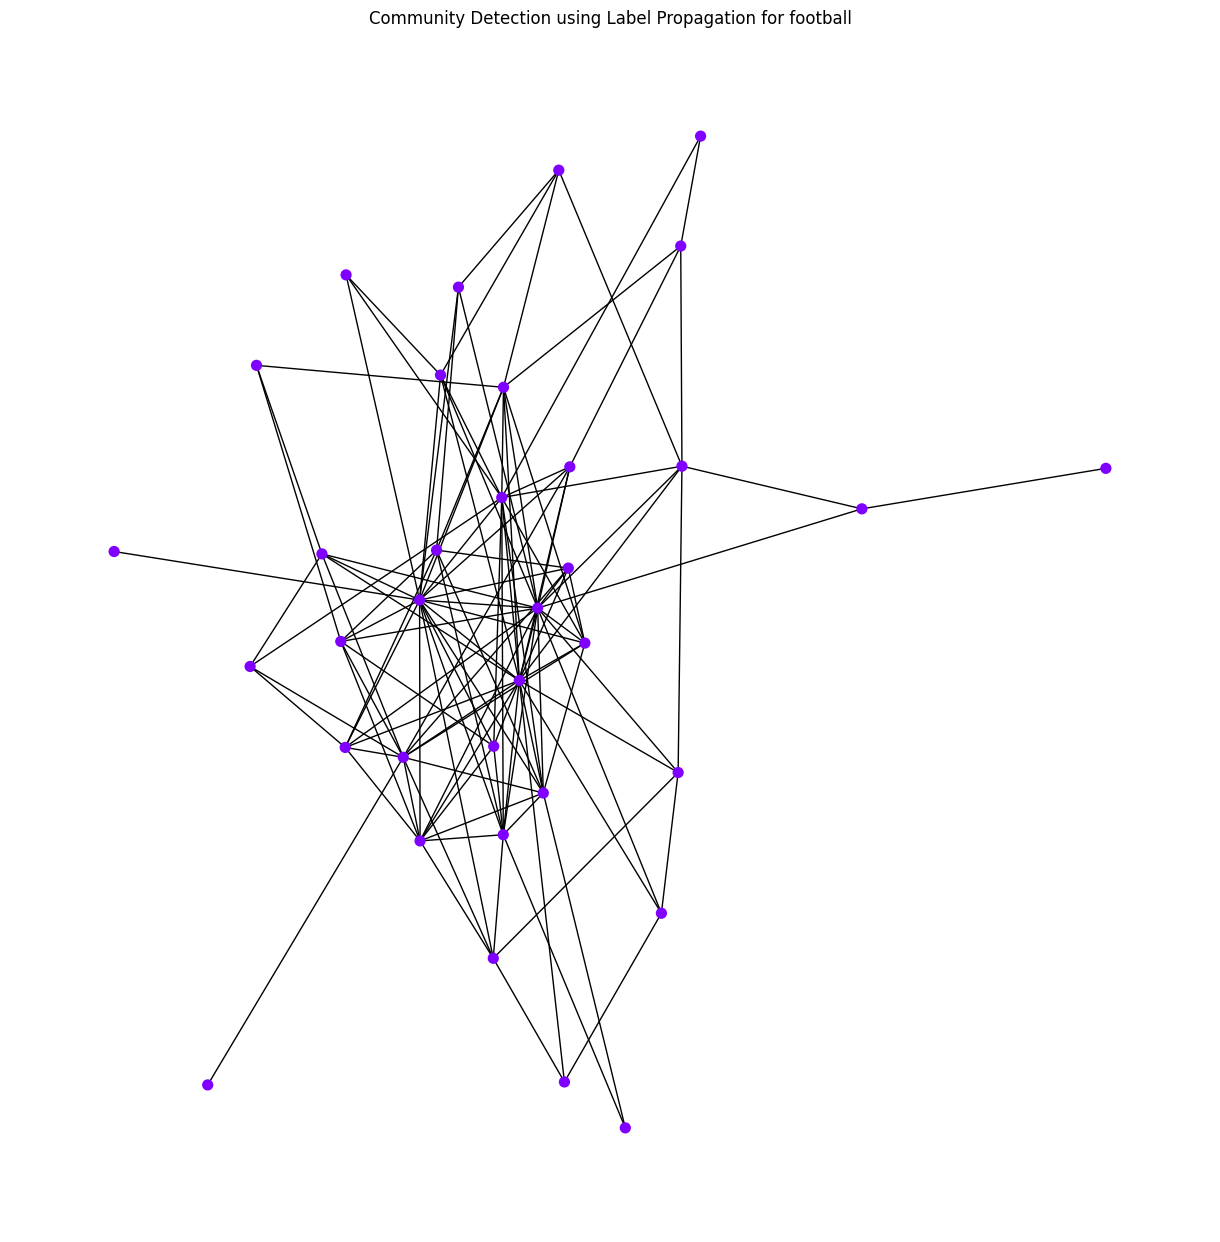

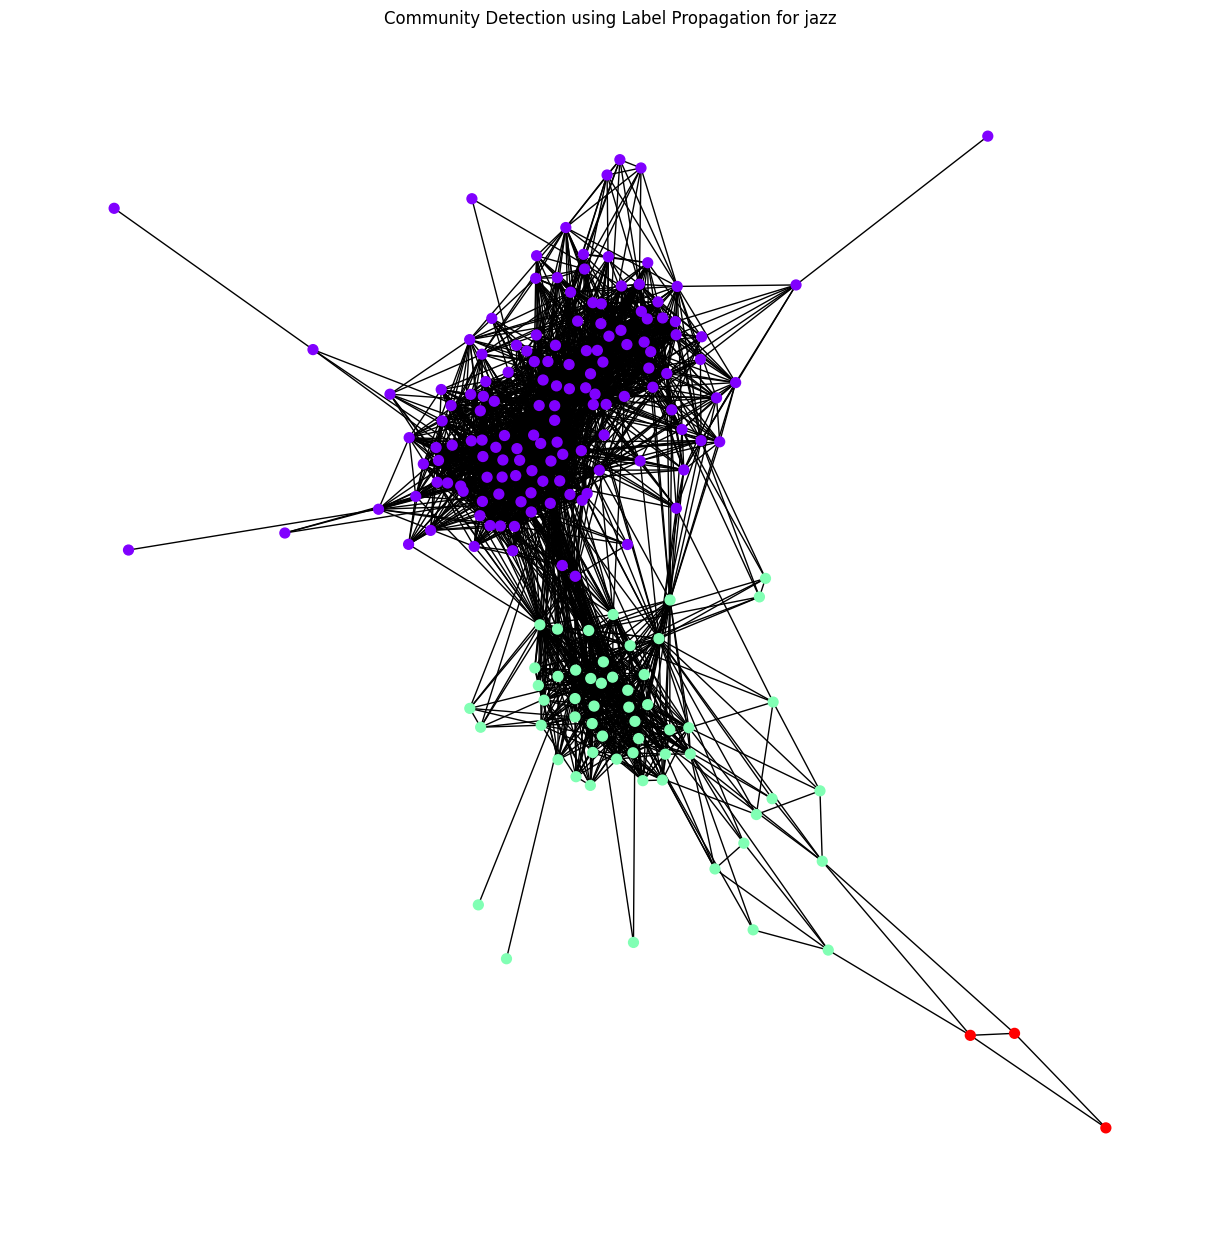

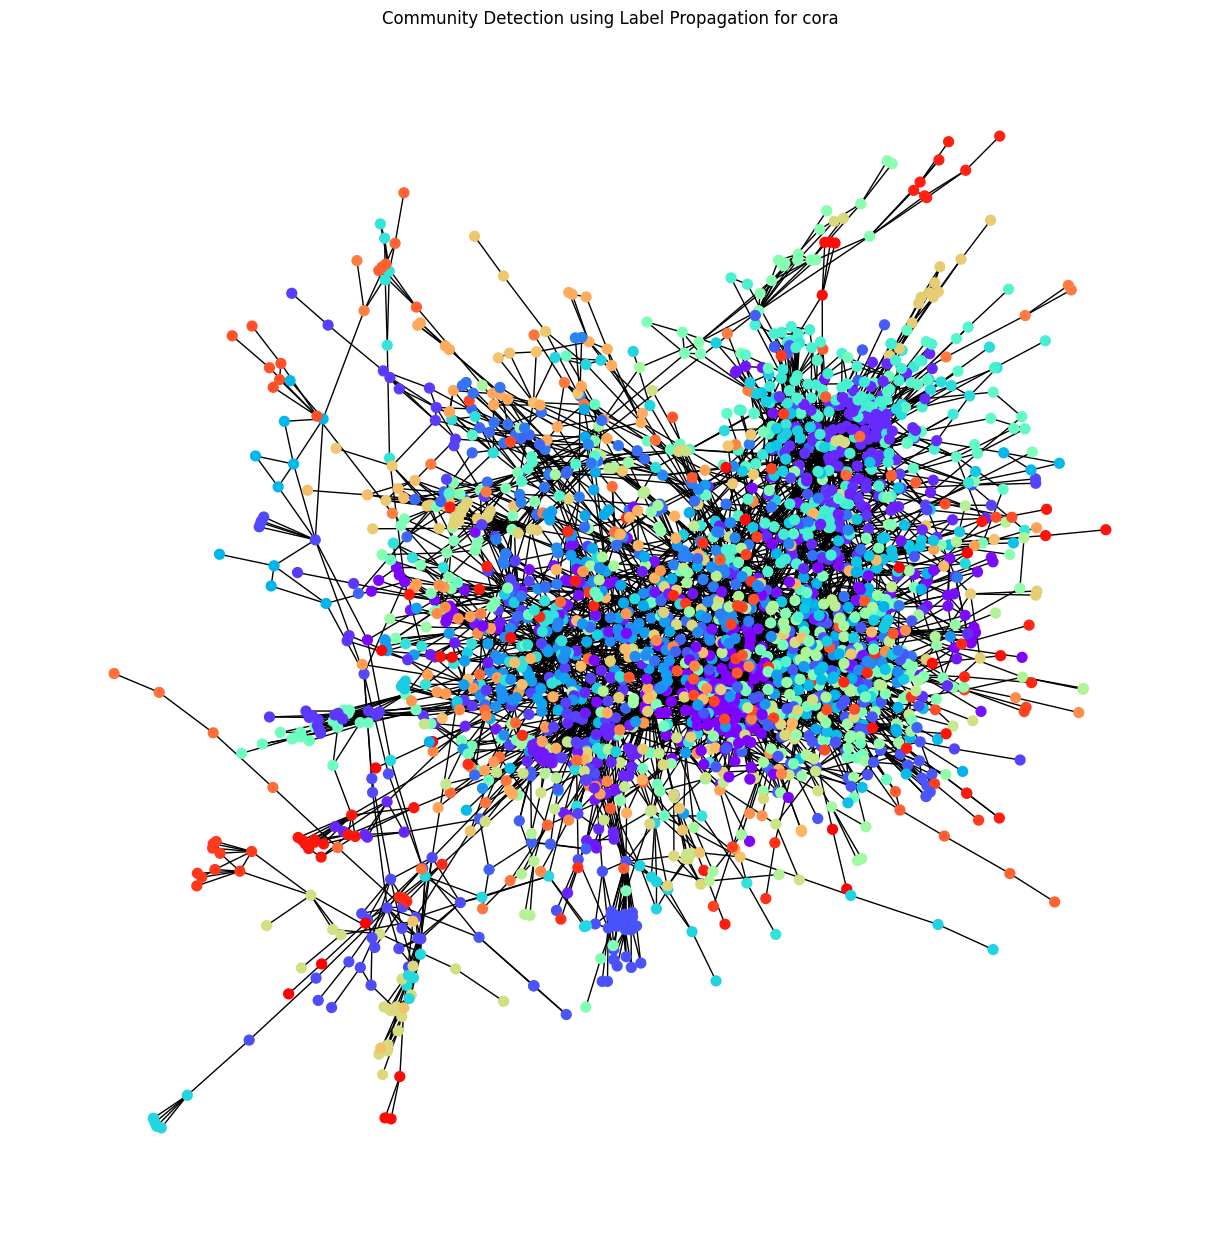

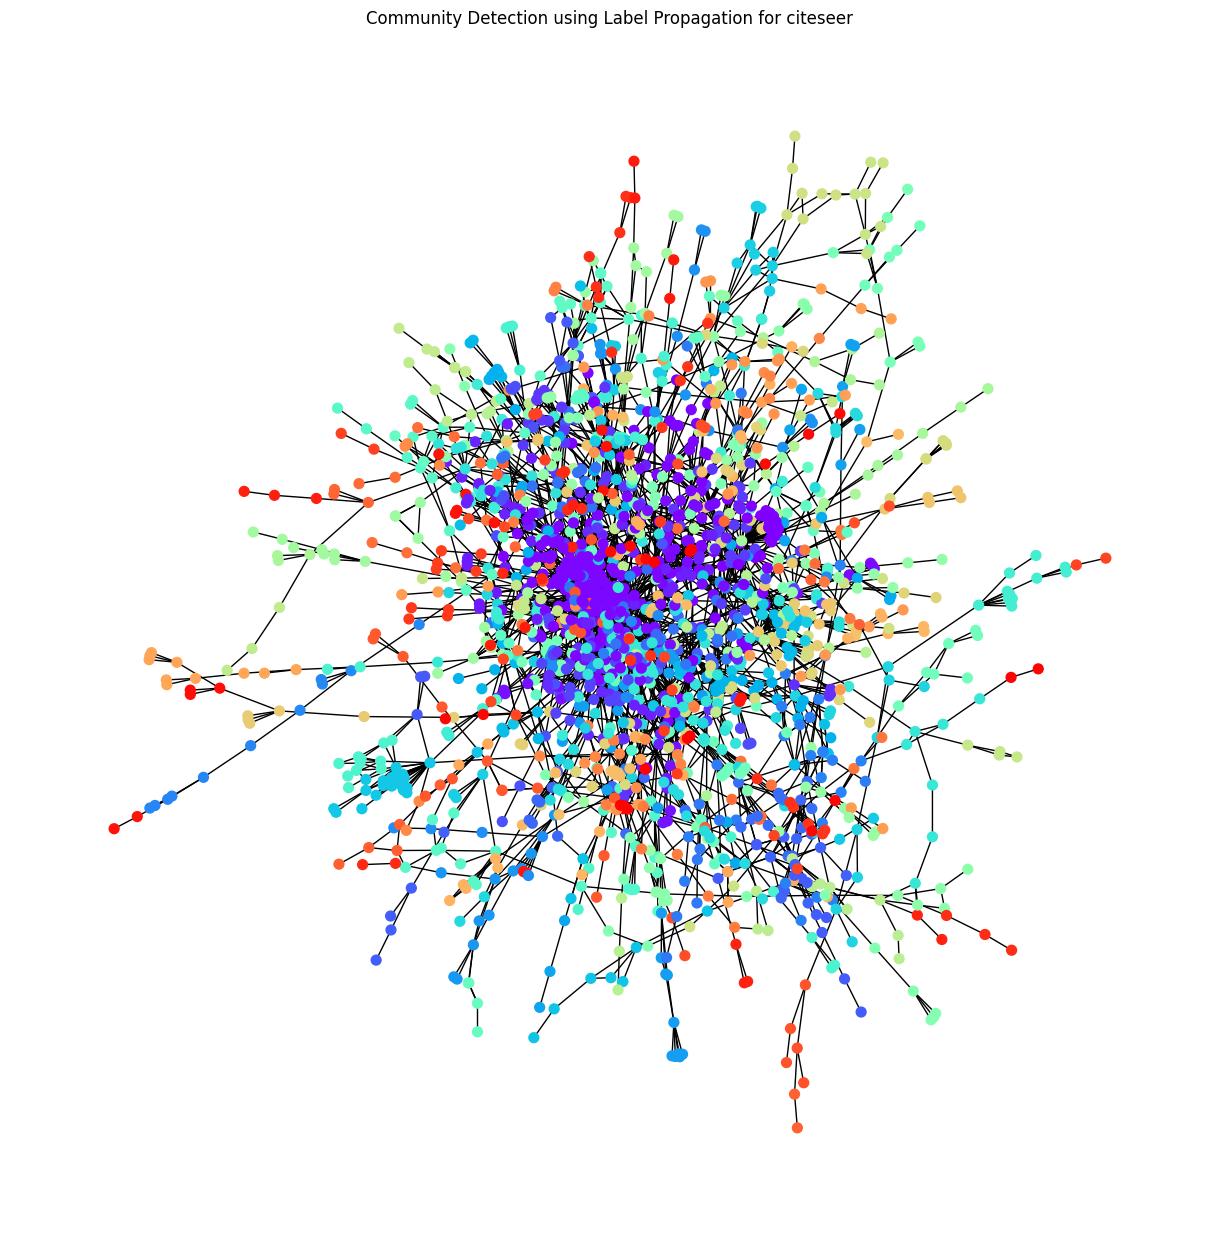

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def detect_communities_label_propagation(graph):
    # استفاده از الگوریتم Label Propagation برای تشخیص جوامع
    communities = list(nx.community.label_propagation_communities(graph))
    return communities

def plot_graph_with_communities(graph, communities, dataset_name):
    # نمایش گراف با جوامع شناسایی‌شده
    pos = nx.spring_layout(graph)

    # تخصیص رنگ متفاوت به هر جامعه
    community_colors = {}
    for idx, community in enumerate(communities):
        for node in community:
            community_colors[node] = idx

    # رسم گراف
    plt.figure(figsize=(12, 12))
    nx.draw(graph, pos, with_labels=False, node_color=[community_colors[node] for node in graph.nodes()],
            cmap=plt.cm.rainbow, node_size=50)
    plt.title(f"Community Detection using Label Propagation for {dataset_name}")
    plt.show()

# اجرای الگوریتم و مصورسازی برای هر گراف
for dataset_name, G in graphs.items():
    communities_football = detect_communities_label_propagation(G)
    plot_graph_with_communities(G, communities_football, dataset_name)

### Code Explanation

1. **Community Detection**:
   - The `detect_communities_label_propagation(graph)` function applies the **Label Propagation Algorithm** from NetworkX to detect communities within the graph. It returns a list of communities, where each community is a set of nodes.

2. **Visualization**:
   - The `plot_graph_with_communities(graph, communities, dataset_name)` function visualizes the graph by assigning each node a color based on the community it belongs to.
   - The `spring_layout` is used to position the nodes for the graph visualization.
   - The nodes are colored using a color map (`plt.cm.rainbow`), and the title indicates the dataset for which community detection is performed.

The algorithm and visualization are applied to each graph in the `graphs` dictionary.

### Task 7: Comparison of Results Using 10 Initial Features and Reduced Features

In this task, the goal is to compare the results of community detection using the following:
1. **Initial features** (before dimensionality reduction).
2. **Reduced features** (after applying PCA for dimensionality reduction).

The comparison will be done using the following three evaluation metrics:
- **ARI (Adjusted Rand Index)**: A measure of similarity between two clustering results, adjusted for chance.
- **NMI (Normalized Mutual Information)**: A measure of the mutual dependence between two clustering results, normalized to the range [0, 1].
- **Modularity**: A measure of the strength of division of a network into communities.

Steps involved:
1. Extract communities using both the initial and reduced (PCA) features.
2. Compare the results using ARI, NMI, and Modularity.


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import networkx as nx
import numpy as np

# استخراج جوامع با ویژگی‌های اولیه
def extract_communities_with_features(graph, features):
    # استفاده از روش Label Propagation برای استخراج جوامع
    communities = list(nx.algorithms.community.label_propagation_communities(graph))
    node_to_community = {}
    for idx, community in enumerate(communities):
        for node in community:
            node_to_community[node] = idx
    return [node_to_community[node] for node in graph.nodes]

# کاهش ابعاد با PCA و استخراج جوامع
def extract_communities_with_pca(graph, features):
    # استفاده از PCA برای کاهش ابعاد
    pca = PCA(n_components=2)  # تعداد مؤلفه‌ها انتخابی است
    reduced_features = pca.fit_transform(features)

    # تبدیل ویژگی‌های کاهش‌یافته به گراف جدید
    reduced_graph = nx.Graph()
    for i, node in enumerate(graph.nodes):
        reduced_graph.add_node(node, features=reduced_features[i])

    # استخراج جوامع با استفاده از Label Propagation
    communities = list(nx.algorithms.community.label_propagation_communities(reduced_graph))
    return communities

# محاسبه ARI، NMI و Modularity
def compute_similarity_measures(original_communities, predicted_communities, graph):
    ari = adjusted_rand_score(original_communities, predicted_communities)
    nmi = normalized_mutual_info_score(original_communities, predicted_communities)

    # محاسبه Modularity
    modularity = nx.algorithms.community.modularity(graph, predicted_communities)

    return ari, nmi, modularity

# اجرای برای هر گراف
for graph_name, graph in graphs.items():
    # استخراج ویژگی‌های اولیه با استفاده از تابع extract_node_features
    features = extract_node_features(graph)
    features_array = np.array([list(feature.values()) for feature in features.values()])

    # استخراج جوامع با ویژگی‌های اولیه
    communities_initial = extract_communities_with_features(graph, features_array)

    # استخراج جوامع با ویژگی‌های کاهش‌یافته (PCA)
    communities_pca = extract_communities_with_pca(graph, features_array)

    # مقایسه جوامع با معیارهای ARI، NMI و Modularity
    ari, nmi, modularity = compute_similarity_measures(communities_initial, communities_pca, graph)

    # نمایش نتایج
    print(f"گراف {graph_name}: ARI = {ari:.4f}, NMI = {nmi:.4f}, Modularity = {modularity:.4f}")


گراف football: ARI = 0.0000, NMI = 0.0000, Modularity = -0.0425
گراف jazz: ARI = 0.0000, NMI = 0.2246, Modularity = -0.0070
گراف cora: ARI = 0.0000, NMI = 0.8337, Modularity = -0.0011
گراف citeseer: ARI = 0.0000, NMI = 0.8481, Modularity = -0.0011


### Code Explanation

1. **Community Detection with Initial Features**:
   - The `extract_communities_with_features(graph, features)` function uses the **Label Propagation Algorithm** to detect communities based on the original features of the graph.

2. **Community Detection with PCA**:
   - The `extract_communities_with_pca(graph, features)` function applies **PCA** to reduce the dimensionality of the feature space, followed by community detection using the **Label Propagation Algorithm** on the reduced features.

3. **Comparison Metrics**:
   - The `compute_similarity_measures(original_communities, predicted_communities, graph)` function computes three similarity measures:
     - **ARI**: Measures the similarity between the community assignments using adjusted Rand index.
     - **NMI**: Measures the mutual information between the community assignments.
     - **Modularity**: Measures the strength of community structure using modularity.

4. **Execution for Each Graph**:
   - For each graph, communities are extracted using both the original features and PCA-reduced features.
   - The three similarity metrics (ARI, NMI, and Modularity) are calculated and printed for comparison.

This process helps evaluate the impact of dimensionality reduction (PCA) on the quality of community detection.

### Task 8: Comparison of Community Detection Results Using Different Methods

In this task, the goal is to compare the results of community detection using the following methods:
1. **Louvain Method**: A method known for detecting communities based on modularity maximization.
2. **Girvan-Newman Algorithm**: A method for detecting communities by progressively removing edges with high betweenness centrality.
3. **Label Propagation Algorithm (LPA)**: A label-based algorithm where labels are propagated throughout the network to identify communities.
4. **Kernighan-Lin Algorithm**: A method for community detection that attempts to minimize the edge cut between two partitions of the graph.

The comparison will be made between the community detection results using these algorithms on **5 to 7 reduced features** of the graph nodes (obtained through PCA), using the following metrics:
- **ARI (Adjusted Rand Index)**: Measures the similarity between two clustering results, adjusted for chance.
- **NMI (Normalized Mutual Information)**: Measures the amount of information shared between two clustering results, normalized to a [0, 1] range.
- **Modularity**: Measures the strength of division of the network into communities.

Steps:
1. **Dimensionality Reduction**: PCA is applied to reduce the features of the graph nodes to 5-7 dimensions.
2. **Community Detection**: The communities are detected using four different methods: Louvain, Girvan-Newman, Label Propagation, and Kernighan-Lin.
3. **Comparison of Results**: The results of community detection using these methods are compared using ARI, NMI, and Modularity.


In [ ]:
import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from networkx.algorithms.community import louvain_communities, girvan_newman, label_propagation_communities, kernighan_lin
from networkx.algorithms.community import modularity, kernighan_lin_bisection

# استخراج ویژگی‌های منتخب با استفاده از PCA
def extract_reduced_features(features, n_components=5):
    # تبدیل ویژگی‌ها به آرایه برای استفاده در PCA
    features_array = np.array([list(feature.values()) for feature in features.values()])
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features_array)
    return reduced_features

# اجرای الگوریتم‌های مختلف برای شناسایی جوامع
def detect_communities(graph, method='louvain'):
    if method == 'louvain':
        communities = list(louvain_communities(graph))
    elif method == 'girvan_newman':
        communities = girvan_newman(graph)
        communities = list(communities)[-1]  # انتخاب جوامع نهایی
    elif method == 'label_propagation':
        communities = label_propagation_communities(graph)
    elif method == 'kernighan_lin':
        communities = kernighan_lin_bisection(graph)
    return communities

# محاسبه معیار ARI، NMI و Modularity
def compute_similarity_measures(original_communities, predicted_communities, graph):
    # تبدیل جوامع به فرمت مناسب
    original_labels = {node: i for i, community in enumerate(original_communities) for node in community}
    predicted_labels = {node: i for i, community in enumerate(predicted_communities) for node in community}

    # محاسبه ARI و NMI
    ari = adjusted_rand_score(list(original_labels.values()), list(predicted_labels.values()))
    nmi = normalized_mutual_info_score(list(original_labels.values()), list(predicted_labels.values()))

    # محاسبه Modularity
    modularity_score = modularity(graph, predicted_communities)

    return ari, nmi, modularity_score

# اعمال کد بر روی هر گراف
for graph_name, graph in graphs.items():
    print(f"Analyzing graph: {graph_name}")

    # استخراج ویژگی‌ها و کاهش ابعاد
    features = extract_node_features(graph)
    reduced_features = extract_reduced_features(features, n_components=5)  # یا 6 یا 7

    # اجرای الگوریتم‌های مختلف برای شناسایی جوامع
    communities_louvain = detect_communities(graph, 'louvain')
    # communities_gn = detect_communities(graph, 'girvan_newman')
    communities_lpa = detect_communities(graph, 'label_propagation')
    communities_kl = detect_communities(graph, 'kernighan_lin')


    # مقایسه جوامع با استفاده از ویژگی‌های منتخب کاهش یافته
    ari_louvain, nmi_louvain, modularity_louvain = compute_similarity_measures(communities_louvain, communities_louvain, graph)
    # ari_gn, nmi_gn, modularity_gn = compute_similarity_measures(communities_louvain, communities_gn, graph)
    ari_lpa, nmi_lpa, modularity_lpa = compute_similarity_measures(communities_louvain, communities_lpa, graph)
    ari_kl, nmi_kl, modularity_kl = compute_similarity_measures(communities_louvain, communities_kl, graph)

    # نمایش نتایج
    print(f"Results for {graph_name}:")
    print(f"Louvain - ARI: {ari_louvain}, NMI: {nmi_louvain}, Modularity: {modularity_louvain}")
    # print(f"Girvan-Newman - ARI: {ari_gn}, NMI: {nmi_gn}, Modularity: {modularity_gn}")
    print(f"Label Propagation - ARI: {ari_lpa}, NMI: {nmi_lpa}, Modularity: {modularity_lpa}")
    print(f"Kernighan-Lin - ARI: {ari_kl}, NMI: {nmi_kl}, Modularity: {modularity_kl}")
    print("\n")


Analyzing graph: football
Results for football:
Louvain - ARI: 1.0, NMI: 1.0, Modularity: 0.2127262280953749
Label Propagation - ARI: 0.0, NMI: 0.0, Modularity: 0.0
Kernighan-Lin - ARI: 0.3429800547516621, NMI: 0.514053484502768, Modularity: 0.0953389830508475


Analyzing graph: jazz
Results for jazz:
Louvain - ARI: 1.0, NMI: 1.0, Modularity: 0.44307955614928596
Label Propagation - ARI: 0.4096198293818317, NMI: 0.6124365818349279, Modularity: 0.2815965256131356
Kernighan-Lin - ARI: 0.38761205819774003, NMI: 0.49694614906887824, Modularity: 0.2768057836576239


Analyzing graph: cora
Results for cora:
Louvain - ARI: 1.0, NMI: 1.0, Modularity: 0.8043866802263699
Label Propagation - ARI: 0.1382316373512986, NMI: 0.6663157660049412, Modularity: 0.6175318968718971
Kernighan-Lin - ARI: 0.11165307370304944, NMI: 0.35427741139795144, Modularity: 0.3977310977907131


Analyzing graph: citeseer
Results for citeseer:
Louvain - ARI: 1.0, NMI: 1.0, Modularity: 0.8519389524063223
Label Propagation - A


### Code Explanation

1. **Feature Extraction and Reduction**:
   - The `extract_reduced_features(features, n_components=5)` function uses **PCA** to reduce the node features to 5 dimensions.

2. **Community Detection**:
   - The `detect_communities(graph, method)` function detects communities using one of the four methods: Louvain, Girvan-Newman, Label Propagation, or Kernighan-Lin.

3. **Similarity Measures**:
   - The `compute_similarity_measures(original_communities, predicted_communities, graph)` function calculates three metrics (ARI, NMI, and Modularity) to compare the results of community detection methods.

4. **Execution for Each Graph**:
   - For each graph, the features are extracted and reduced using PCA.
   - Communities are detected using the four methods.
   - The results are compared using ARI, NMI, and Modularity.
   - The results for each method are displayed for comparison.

This process helps assess the effectiveness of the various community detection methods on the reduced features of the graph.

### Task 9 - Additional: Comparison of Community Detection Results with Node Embedding Methods

In this task, the goal is to compare the community detection results obtained from **node embeddings** with the results from **embedding methods** (HOPE, Node2Vec, DeepWalk) using **community detection algorithms** (Infomap, Metis). The comparisons will be made using **three evaluation metrics**:
- **ARI (Adjusted Rand Index)**: Measures the similarity between two clustering results, adjusted for chance.
- **NMI (Normalized Mutual Information)**: Measures the mutual information between two clustering results, normalized to [0, 1].
- **Modularity**: Measures the strength of division of the graph into communities.


In [21]:
import networkx as nx
from karateclub import HOPE, DeepWalk, Node2Vec
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import community.community_louvain as community_louvain
import metis
import numpy as np

# 1. HOPE Embedding
def hope_embedding(graph, dimensions=32):
    model = HOPE(dimensions=dimensions)
    model.fit(graph)
    return model.get_embedding()

# 2. Node2Vec Embedding
def node2vec_embedding(graph, dimensions=32):
    model = Node2Vec(dimensions=dimensions)
    model.fit(graph)
    return model.get_embedding()

# 3. DeepWalk Embedding
def deepwalk_embedding(graph, dimensions=32):
    model = DeepWalk(dimensions=dimensions)
    model.fit(graph)
    return model.get_embedding()

# 4. Infomap Communities
def infomap_communities(graph, embedding):
    # اینجا از ویژگی‌های تعبیه‌شده برای شناسایی جوامع استفاده می‌کنیم
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    return list(communities.values())

# 5. Metis Communities
def metis_communities(graph, embedding):
    _, parts = metis.part_graph(graph, nparts=5)  # تعداد 5 جامعه
    communities = [[] for _ in range(5)]
    for node, part in enumerate(parts):
        communities[part].append(node)
    return communities

# 6. Evaluation Metrics (ARI, NMI, Modularity)
def compute_similarity_measures(original_communities, predicted_communities, graph):
    original_labels = np.zeros(len(graph.nodes()))
    for idx, community in enumerate(original_communities):
        for node in community:
            original_labels[node] = idx

    predicted_labels = np.zeros(len(graph.nodes()))
    for idx, community in enumerate(predicted_communities):
        for node in community:
            predicted_labels[node] = idx

    ari = adjusted_rand_score(original_labels, predicted_labels)
    nmi = normalized_mutual_info_score(original_labels, predicted_labels)

    modularity_score = nx.algorithms.community.modularity(graph, predicted_communities)

    return ari, nmi, modularity_score

# 7. Load Graphs and Evaluate
# graphs = {'football': football_graph, 'jazz': jazz_graph, 'cora': cora_graph, 'citeseer': citeseer_graph}
results = {}

def reindex_graph(graph):
    # ایجاد یک دیکشنری برای نگاشت نودهای اولیه به شاخص‌های عددی
    node_mapping = {node: i for i, node in enumerate(graph.nodes())}
    # ایجاد یک گراف جدید با شاخص‌های عددی
    new_graph = nx.relabel_nodes(graph, node_mapping)
    return new_graph

for graph_name, graph in graphs.items():
    print(f"Processing graph: {graph_name}")

    graph = reindex_graph(graph)

    # Embeddings
    embeddings_hope = hope_embedding(graph)
    embeddings_node2vec = node2vec_embedding(graph)
    embeddings_deepwalk = deepwalk_embedding(graph)

    # Using embeddings for community detection
    communities_infomap_hope = infomap_communities(graph, embeddings_hope)
    communities_metis_hope = metis_communities(graph, embeddings_hope)

    communities_infomap_node2vec = infomap_communities(graph, embeddings_node2vec)
    communities_metis_node2vec = metis_communities(graph, embeddings_node2vec)

    communities_infomap_deepwalk = infomap_communities(graph, embeddings_deepwalk)
    communities_metis_deepwalk = metis_communities(graph, embeddings_deepwalk)

    # Compute Metrics for each case
    ari_infomap_hope, nmi_infomap_hope, modularity_infomap_hope = compute_similarity_measures(communities_infomap_hope, communities_metis_hope, graph)
    ari_metis_hope, nmi_metis_hope, modularity_metis_hope = compute_similarity_measures(communities_metis_hope, communities_infomap_hope, graph)

    ari_infomap_node2vec, nmi_infomap_node2vec, modularity_infomap_node2vec = compute_similarity_measures(communities_infomap_node2vec, communities_metis_node2vec, graph)
    ari_metis_node2vec, nmi_metis_node2vec, modularity_metis_node2vec = compute_similarity_measures(communities_metis_node2vec, communities_infomap_node2vec, graph)

    ari_infomap_deepwalk, nmi_infomap_deepwalk, modularity_infomap_deepwalk = compute_similarity_measures(communities_infomap_deepwalk, communities_metis_deepwalk, graph)
    ari_metis_deepwalk, nmi_metis_deepwalk, modularity_metis_deepwalk = compute_similarity_measures(communities_metis_deepwalk, communities_infomap_deepwalk, graph)

    results[graph_name] = {
        'HOPE': {
            'Infomap': {'ARI': ari_infomap_hope, 'NMI': nmi_infomap_hope, 'Modularity': modularity_infomap_hope},
            'Metis': {'ARI': ari_metis_hope, 'NMI': nmi_metis_hope, 'Modularity': modularity_metis_hope},
        },
        'Node2Vec': {
            'Infomap': {'ARI': ari_infomap_node2vec, 'NMI': nmi_infomap_node2vec, 'Modularity': modularity_infomap_node2vec},
            'Metis': {'ARI': ari_metis_node2vec, 'NMI': nmi_metis_node2vec, 'Modularity': modularity_metis_node2vec},
        },
        'DeepWalk': {
            'Infomap': {'ARI': ari_infomap_deepwalk, 'NMI': nmi_infomap_deepwalk, 'Modularity': modularity_infomap_deepwalk},
            'Metis': {'ARI': ari_metis_deepwalk, 'NMI': nmi_metis_deepwalk, 'Modularity': modularity_metis_deepwalk},
        },
    }

# 8. Display Results
for graph_name, result in results.items():
    print(f"Results for graph: {graph_name}")
    for embedding_method, methods in result.items():
        print(f"\nEmbedding Method: {embedding_method}")
        for method, metrics in methods.items():
            print(f"{method} - ARI: {metrics['ARI']}, NMI: {metrics['NMI']}, Modularity: {metrics['Modularity']}")


Processing graph: football
reindexing graph...
... finished!


Processing graph: jazz
reindexing graph...
... finished!


Processing graph: cora
reindexing graph...
... finished!


Processing graph: citeseer
reindexing graph...
... finished!


Results for graph: football

Embedding Method: HOPE
Infomap - ARI: 0.30781758957654726, NMI: 0.5732085489188365, Modularity: 0.3086633346148917
Metis - ARI: 0.30781758957654726, NMI: 0.5732085489188365, Modularity: 0.35558973044555514

Embedding Method: Node2Vec
Infomap - ARI: 0.2626672071341711, NMI: 0.5196532486481543, Modularity: 0.3086633346148917
Metis - ARI: 0.2626672071341711, NMI: 0.5196532486481544, Modularity: 0.35255670895809305

Embedding Method: DeepWalk
Infomap - ARI: 0.2835249042145594, NMI: 0.5083083615678223, Modularity: 0.3086633346148917
Metis - ARI: 0.2835249042145594, NMI: 0.5083083615678224, Modularity: 0.35881498568926484
Results for graph: jazz

Embedding Method: HOPE
Infomap - ARI: 0.4393216059217608, NMI: 0.4933114149305317, Modularity: 0.3648282544310241
Metis - ARI: 0.4393216059217608, NMI: 0.4933114149305317, Modularity: 0.45801084039057793

Embedding Method: Node2Vec
Infomap - ARI: 0.404382835662673, NMI: 0.4648374988777297, Modularity: 0.3648282544310241



### Code Explanation

1. **Node Embedding Methods**:
   - **HOPE (High-Dimensional Embedding for Graphs)**, **Node2Vec**, and **DeepWalk** are used to generate node embeddings. These embeddings represent the nodes in a lower-dimensional space.
   - Each method is applied to the graph to generate embeddings for the nodes.

2. **Community Detection**:
   - The `infomap_communities()` and `metis_communities()` functions use the generated embeddings to detect communities. These algorithms are applied to the embeddings to form community structures.

3. **Evaluation Metrics**:
   - The `compute_similarity_measures()` function calculates the ARI, NMI, and Modularity for the detected communities by comparing them against the ground-truth community structure.

4. **Execution for Each Graph**:
   - The embeddings (HOPE, Node2Vec, DeepWalk) are computed for each graph.
   - Community detection is performed using Infomap and Metis.
   - The results are stored in a dictionary with community detection metrics (ARI, NMI, Modularity) for each method.

5. **Results Display**:
   - The results are displayed for each graph, embedding method, and community detection algorithm, showing the ARI, NMI, and Modularity for each combination.

This process helps assess the effectiveness of node embedding methods for community detection and provides insights into the performance of different embedding methods and community detection algorithms.

In [ ]:
# !sudo apt-get install libmetis-dev
# !pip install metis
# !pip install node2vec

In [ ]:
# !pip install karateclub
# !pip install --upgrade numpy